<a href="https://colab.research.google.com/github/caltunay/tr_lyric_generator/blob/main/2_TR_Turk_Sanat_Muzigi_Lyrics_Generator_w_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/NLP/Song Lyric Generator/tr_songs -needs vocab clean-.json')

In [ ]:
df.sample(5)

In [ ]:
rand_inds = np.random.randint(0, len(df)-1, 10)

for i in rand_inds:
    print(df['Lyrics _Fixed Ls'][i])
    print('\n========================\n')

In [ ]:
# if \n is followed by a space OR if the first char is space, replace.

def space_replacer(text_):

    text_list = list(text_)
    
    # if first char is space, replace 
    if text_list[0] == ' ':
        text_list[0] = ''
    
    # replace if space is after line break 
    for ind, char in enumerate(text_list):
        if char == ' ' and text_list[ind-1] == '\n':
            text_list[ind] = ''

    return ''.join(text_list)

In [ ]:
df['Lyrics _Fixed Ls'] = df['Lyrics _Fixed Ls'].apply(lambda x: x.lower())
df['Lyrics _Fixed Ls'] = df['Lyrics _Fixed Ls'].apply(space_replacer)
df = df[~df['Lyrics _Fixed Ls'].str.contains('verse|nakarat|söz :|müzik :')][['Artist Name', 'Lyrics _Fixed Ls', 'Song Name']].reset_index(drop = True)

In [ ]:
for i in np.random.choice(df['Artist Name'].unique(), 20):
    print(i)

Eylem Aktaş
Direc-t
Fatih Tuğcu
Demet Sağıroğlu
Rabia
Özkan Uğur
Volkan Konak
Emir Şamur
Velet
Ozbi
Hakan Altun
Zara
Burak Kibar
Güçlü Soydemir
Gökçe
İdo Tatlıses
Kaptan
Gökşin Derin
Bahadır Tatlıöz
Sansar Salvo


In [ ]:
turk_sanat_muzigi = '''emel sayın
,zeki müren
,muazzez ersoy
,müzeyyen senar
,bülent ersoy
,behiye aksoy
,muazzez abacı
,sibel can
,zara
,gönül yazar
,ahmet özhan
,ebru gündeş
,hamiyet yüceses
,safiye ayla
,arif sami toker
,ferdi tayfur
,sevim tanürek
,münir nurettin selçuk
,neveser kökdeş
,radife erten
,erol evgin
,niyazi sayın
,ayşe mine
,özdemir erdoğan
,bekır sıdkı sezgin
,erol sayan'''.split('\n,')

In [ ]:
tsm_filter = list()

for sanatci in turk_sanat_muzigi:
    if sanatci in df['Artist Name'].apply(lambda x:x.lower()).unique():
        tsm_filter.append(sanatci)
        # print(rapci)

print(tsm_filter)

['emel sayın', 'zeki müren', 'muazzez ersoy', 'bülent ersoy', 'muazzez abacı', 'sibel can', 'zara', 'ahmet özhan', 'ebru gündeş', 'ferdi tayfur', 'erol evgin', 'özdemir erdoğan']


In [ ]:
df['artist name - lower case'] = df['Artist Name'].apply(lambda x : x.lower())

In [ ]:
tsm_songs = df[df['artist name - lower case'].isin(tsm_filter)].reset_index(drop = True)
tsm_songs

,Artist Name,Lyrics _Fixed Ls,Song Name,artist name - lower case
0,Ahmet Özhan,zahid bizi tan eyleme\nhak ismin okur dilimiz\...,Zahid Bizi Tan Eyleme,ahmet özhan
1,Ahmet Özhan,zamanı var ki her bezmim anarsın\nbeni bir gün...,Zaman Var ki,ahmet özhan
2,Ahmet Özhan,yürük değirmenler gibi döner döner dönerler\ne...,Yürük Değirmenler Gibi (ft. Serkan Çağrı),ahmet özhan
3,Ahmet Özhan,yine efkarlıyım dilim dönmüyor\nkalbimdeki hic...,Yine Efkarlıyım,ahmet özhan
4,Bülent Ersoy,"zaman akıp gider durulmadan\nne sual , ne ceva...",Zaman Akıp Gider,bülent ersoy
...,...,...,...,...
2250,Ahmet Özhan,akşam oldu hüzünlendim ben yine\nhasret kaldım...,Akşam Oldu Hüzünlendim,ahmet özhan
2251,Ahmet Özhan,sana olan duyguları bir bilebilsen\nanlayabils...,Ah Le Yar,ahmet özhan
2252,Ahmet Özhan,ağlar gezerim sahili sanki benimlesin\nayda yü...,Ağlar Gezerim,ahmet özhan
2253,Ahmet Özhan,açılır gonca gül yar seni sevse bülbül yar\nse...,Açılır Gonca Gül Yar,ahmet özhan


In [ ]:
rand_inds = np.random.randint(0, len(tsm_songs)-1, 10)

for i in rand_inds:
    print(tsm_songs['Lyrics _Fixed Ls'][i])
    print('\n===============================\n')

In [ ]:
# might be worthwhile removing any lyrics that doesnt include any of below, to remove lyrics typed by english keyboards.

tr_chars = ['ö','û','ü','ğ','ı','ş']

tsm_songs = tsm_songs[tsm_songs['Lyrics _Fixed Ls'].str.contains('|'.join(tr_chars))].reset_index(drop = True)

In [ ]:
# remove lyrics with x2 x3 x4 .. total # of songs is enough big to remove a few. 
# if genre has a lower count of lyrics here, could be investigated to be replaced  .apply(lambda x: re.sub('x\d', '', x))
tsm_songs = tsm_songs[~tsm_songs['Lyrics _Fixed Ls'].str.contains('x\d')].reset_index(drop = True)

In [ ]:
tsm_songs['Song Length'] = tsm_songs['Lyrics _Fixed Ls'].apply(len)

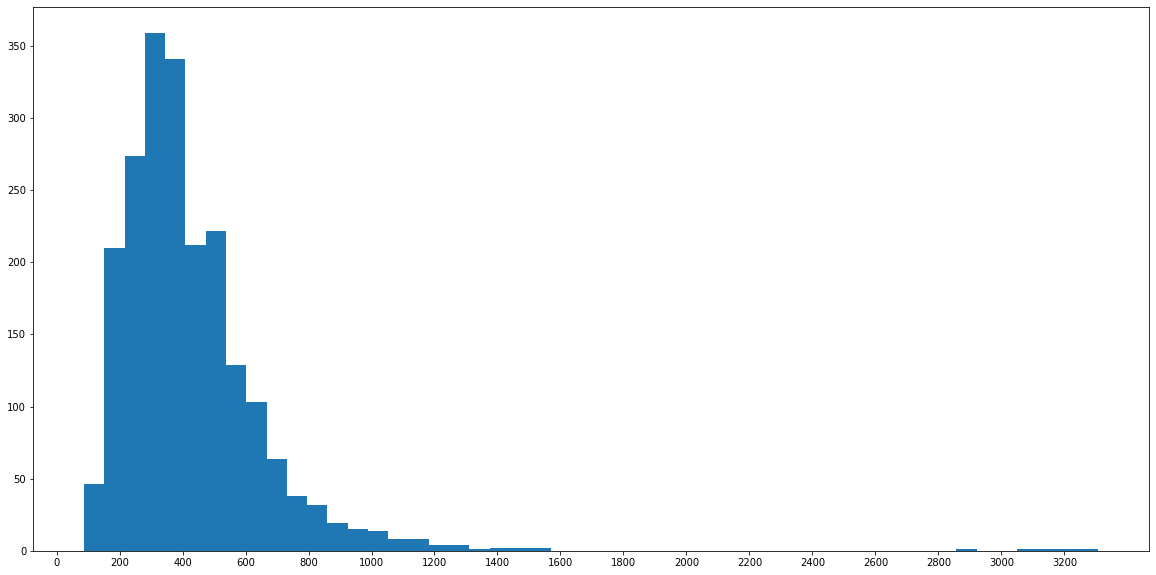

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.hist(tsm_songs['Song Length'], bins = 50)
plt.xticks(ticks = np.arange(start = 0, stop = 3400, step = 200));

In [ ]:
sorted(set(''.join(tsm_songs['Lyrics _Fixed Ls'])))

In [ ]:
sorted(set(''.join(tsm_songs['Lyrics _Fixed Ls'])))
'''
remove all containing
'söz:' 
'müzik:'
'_'
'w'
'x'
'}'

replace with '‘', 
'“',

replace with '’',
'”',

replace w "'"
 '`' 

replace w 'ö'
'ó'

replace w 'û'
'ú'

replace w 'î',
'í'

replace w 'â'
'á', 'à'
'á|à'


rep w ''
 '&' 
 '(',')' 
 '*'
 '\d'
'\x85'
'\x92'
'\ufeff''''


'\&|\(|\)|\*|\d|\x85|\x92|\ufeff'

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('\&|\(|\)|\*|\d|\x85|\x92|\ufeff', '', x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('á|à', 'â', x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('í','î', x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('ú','û', x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('ó','ö', x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub("`","'", x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('”','’', x))

In [ ]:
tsm_songs['Lyrics _Fixed Ls'] = tsm_songs['Lyrics _Fixed Ls'].apply(lambda x : re.sub('“','‘', x))

In [ ]:
tsm_songs = tsm_songs[~tsm_songs['Lyrics _Fixed Ls'].str.contains('söz:|müzik:|_|w|x|}')]

In [ ]:
tsm_songs = tsm_songs[~tsm_songs['Lyrics _Fixed Ls'].str.contains('\t')]

In [ ]:
tsm_songs

,Artist Name,Lyrics _Fixed Ls,Song Name,artist name - lower case,Song Length
0,Ahmet Özhan,zahid bizi tan eyleme\nhak ismin okur dilimiz\...,Zahid Bizi Tan Eyleme,ahmet özhan,537
1,Ahmet Özhan,zamanı var ki her bezmim anarsın\nbeni bir gün...,Zaman Var ki,ahmet özhan,127
2,Ahmet Özhan,yürük değirmenler gibi döner döner dönerler\ne...,Yürük Değirmenler Gibi (ft. Serkan Çağrı),ahmet özhan,361
3,Ahmet Özhan,yine efkarlıyım dilim dönmüyor\nkalbimdeki hic...,Yine Efkarlıyım,ahmet özhan,130
4,Bülent Ersoy,"zaman akıp gider durulmadan\nne sual , ne ceva...",Zaman Akıp Gider,bülent ersoy,681
...,...,...,...,...,...
2109,Ahmet Özhan,akşam oldu hüzünlendim ben yine\nhasret kaldım...,Akşam Oldu Hüzünlendim,ahmet özhan,134
2110,Ahmet Özhan,sana olan duyguları bir bilebilsen\nanlayabils...,Ah Le Yar,ahmet özhan,490
2111,Ahmet Özhan,ağlar gezerim sahili sanki benimlesin\nayda yü...,Ağlar Gezerim,ahmet özhan,161
2112,Ahmet Özhan,açılır gonca gül yar seni sevse bülbül yar\nse...,Açılır Gonca Gül Yar,ahmet özhan,355


In [ ]:
tsm_songs = tsm_songs[(tsm_songs['Song Length']<450) & (tsm_songs['Song Length']>150)].reset_index(drop = True)

In [ ]:
tsm_songs.groupby('Artist Name').size()

Artist Name
Ahmet Özhan         96
Bülent Ersoy       123
Ebru Gündeş         89
Emel Sayın         136
Erol Evgin          45
Ferdi Tayfur       118
Muazzez Abacı        7
Muazzez Ersoy      145
Sibel Can           65
Zara               100
Zeki Müren         356
Özdemir Erdoğan     12
dtype: int64

In [ ]:
vocab = sorted(set(''.join(tsm_songs['Lyrics _Fixed Ls'])))

In [ ]:
vocab

['\n',
 ' ',
 '!',
 "'",
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'y',
 'z',
 'â',
 'ç',
 'ê',
 'î',
 'ö',
 'û',
 'ü',
 'ğ',
 'ı',
 'ş',
 '̇',
 '‘',
 '’',
 '…']

In [ ]:
lyrics = tsm_songs['Lyrics _Fixed Ls']

In [ ]:
char_to_ind = {char:ind for ind, char in enumerate(vocab)}
ind_to_char = {ind:char for ind, char in enumerate(vocab)}

In [ ]:
max_len = 45
input_list = []
target_list = []

for song in lyrics:
    for char_ind in range(0, len(song) - max_len):
        input_list.append(song[char_ind : char_ind + max_len])
        target_list.append(song[char_ind + max_len])

In [ ]:
print(len(input_list), len(target_list))

337360 337360


In [ ]:
x_arr = np.zeros((len(input_list), max_len, len(vocab) ), dtype = 'float32')
y_arr = np.zeros((len(target_list), len(vocab)), dtype = 'float32')


for ind_song, song in enumerate(input_list):
    for ind_char, char in enumerate(song):
        x_arr[ind_song, ind_char, char_to_ind[char]] = 1
    y_arr[ind_song , char_to_ind[target_list[ind_song]]] = 1

In [ ]:
# create baseline model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
import sys
from tensorflow.keras.callbacks import LambdaCallback, EarlyStopping, ModelCheckpoint
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [ ]:
model2 = Sequential()

model2.add(CuDNNLSTM(units = 512, input_shape = (max_len, len(vocab)), return_sequences = True))
model2.add(Dropout(.2))
model2.add(CuDNNLSTM(units = 512, return_sequences = True))
model2.add(Dropout(.2))
model2.add(CuDNNLSTM(units = 512, return_sequences = True))
model2.add(Dropout(.2))
model2.add(CuDNNLSTM(units = 512))#, return_sequences = True))
model2.add(Dropout(.2))
# model2.add(CuDNNLSTM(units = 128, return_sequences = True))
# model2.add(Dropout(.2))
# model2.add(CuDNNLSTM(units = 128))
# model2.add(Dropout(.2))

model2.add(Dense(len(vocab), activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 45, 512)           1148928   
_________________________________________________________________
dropout (Dropout)            (None, 45, 512)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 45, 512)           2101248   
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 512)           0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 45, 512)           2101248   
_________________________________________________________________
dropout_2 (Dropout)          (None, 45, 512)           0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 512)               2

In [ ]:
def sample(preds, temperature = 1.0):
    # helper to sample index from a prob array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature

    preds = np.exp(preds) / np.sum(np.exp(preds))
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def on_epoch_end2(epoch, _):

    # function invoked at end of each epoch to print generated text
    print()
    print('----Generating text after epoch %d' % epoch)

    start_index = 0
    # text_starter = np.random.randint(0, len(indie_lyrics_sampled)-100)
    # text_ender = text_starter + 99 
    # lyric_ = text_[text_starter : text_ender]  # select random part of lyrics
    
    random_song_ind = np.random.randint(0, len(lyrics)-1)
    random_song = lyrics[random_song_ind]


    for temp in [.2, .5, 1]:
        print('Temperature at : ', temp)
        print('\n')
        generated = ''
        sentence = random_song[start_index : start_index + max_len]
        generated += sentence

        print('---Original lyrics (first 200 chars): \n', random_song[:200])
        print('\n---Generated with seed: \n"' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(300):
            x_pred = np.zeros((1, max_len, len(vocab)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_to_ind[char]] = 1

            preds = model2.predict(x_pred, verbose = 0)[0]
            next_index = sample(preds, temp)
            next_char = ind_to_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()

        print()
        print('\n')

In [ ]:
# fit model
epoch_summary2 = LambdaCallback(on_epoch_end = on_epoch_end2)
earlyStopper = EarlyStopping(monitor = 'val_accuracy', patience = 5)

model_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Song Lyric Generator/TR_TSM_lyric_generator(seed len 45).hdf5'

checkpoint_= ModelCheckpoint(model_path, monitor='val_accuracy', verbose=0, save_best_only=True)


model2.fit(x_arr, y_arr, epochs = 50, batch_size = 512, callbacks = [epoch_summary2, earlyStopper, checkpoint_], validation_split = .25, shuffle = True)

Epoch 1/50
495/495 [==============================] - 196s 365ms/step - loss: 3.2308 - accuracy: 0.0990 - val_loss: 3.1171 - val_accuracy: 0.1184

----Generating text after epoch 0
Temperature at :  0.2


---Original lyrics (first 200 chars): 
 odam kireç tutmuyor
kumunu katmayınca
sevda baştan gitmiyor
sarılıp yatmayınca
baba ben derviş miyem
hırkamı giymiş miyem
ben sevdim eller aldı
niye ben ölmüş müyem
odamı kireç eyle
yüzümü güleç eyle


---Generated with seed: 
"odam kireç tutmuyor
kumunu katmayınca
sevda b"
odam kireç tutmuyor
kumunu katmayınca
sevda b e  aa     a    a e   ee ee a   i e a a e   n  e  en            e a re ieeead   e   aea  e aeee  e        a r a   ia   eeae  eee   ae e   aea       aiae a e ma ea ea eaae  e ae   e     l  e  a  e ie    a n eem     a   e   aria ereee aaalma a  aae   l  e ae e e   ea     a e aae ea le  a      l  e  aa


Temperature at :  0.5


---Original lyrics (first 200 chars): 
 odam kireç tutmuyor
kumunu katmayınca
sevda baştan gitmiyor
sarılıp 